### From http://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

predicted=349.117679, expected=342.300000
predicted=306.512983, expected=339.700000
predicted=387.376426, expected=440.400000
predicted=348.154162, expected=315.900000
predicted=386.308792, expected=439.300000
predicted=356.082033, expected=401.300000
predicted=446.379439, expected=437.400000
predicted=394.737250, expected=575.500000
predicted=434.915452, expected=407.600000
predicted=507.923366, expected=682.000000
predicted=435.482916, expected=475.300000
predicted=652.743868, expected=581.300000
predicted=546.343411, expected=646.900000
Test MSE: 6958.330


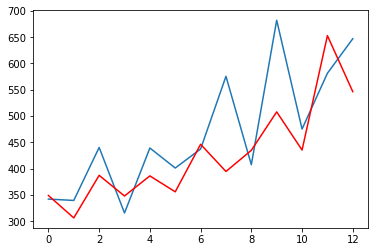

[ 342.3  339.7  440.4  315.9  439.3  401.3  437.4  575.5  407.6  682.
  475.3  581.3  646.9]
[array([ 349.11767873]), array([ 306.51298317]), array([ 387.37642601]), array([ 348.15416214]), array([ 386.30879203]), array([ 356.08203303]), array([ 446.37943894]), array([ 394.73724984]), array([ 434.91545243]), array([ 507.92336603]), array([ 435.48291564]), array([ 652.74386839]), array([ 546.34341114])]


In [2]:
import pandas as pd
#from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
	return pd.datetime.strptime('190'+str(x), '%Y-%m')

series = pd.read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
#plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
print(test)
print(predictions)